In [ ]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import *
from sklearn.naive_bayes import *
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

#Per linear classification
from sklearn.linear_model import Perceptron
from sklearn import svm

print('Libraries imported.')

Libraries imported.


In [ ]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 6.9 MB/s 
time: 1.03 ms (started: 2022-12-05 16:12:56 +00:00)


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive
time: 22.1 s (started: 2022-12-05 16:12:56 +00:00)


In [ ]:
filename = '/content/drive/MyDrive/ColabNotebooks/MachineLearning/HomeWork1_Dataset.tsv'
df = pd.read_csv(filename, sep='\t', header=0)
print('File loaded: %d samples.' %(len(df)))
print("Number of columns: ", len(df.columns))

File loaded: 1000 samples.
Number of columns:  37
time: 650 ms (started: 2022-12-05 16:13:18 +00:00)


In [ ]:
X_all = df.iloc[:,:35]
classification_y_all = df['num_collisions']
regression_y_all = df['min_CPA']


#apply normalization
X_normalized = X_all.copy()
for column in X_normalized.columns:
  X_normalized[column] = (X_normalized[column] - X_normalized[column].min()) / (X_normalized[column].max() - X_normalized[column].min())    


reg_y_all_normalized = regression_y_all.copy()
reg_y_all_normalized = (reg_y_all_normalized - reg_y_all_normalized.min()) / (reg_y_all_normalized.max() - reg_y_all_normalized.min())    


time: 85.8 ms (started: 2022-12-05 16:13:18 +00:00)


#Divisione del dataset normalizzato in train set e training set

In [ ]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X_normalized,classification_y_all,train_size=0.66,random_state=200)

print("Dataset x train :", x_train.shape)
print("Dataset y train :", y_train.shape)
print("Dataset x test :", x_test.shape)
print("Dataset y test :", y_test.shape)

Dataset x train : (660, 35)
Dataset y train : (660,)
Dataset x test : (340, 35)
Dataset y test : (340,)
time: 16.2 ms (started: 2022-12-05 16:13:30 +00:00)


#LOGISTIC REGRESSION

In [ ]:
#Import del modello logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
      'classifier__penalty' : ['l2','none'],
      'classifier__C' : np.logspace(-4, 4, 20),
      'classifier__solver' : ['newton-cg'],
      #'class_weight': ['balanced']
     }
    ]


#Grid search
pipe = Pipeline([('classifier' , LogisticRegression(multi_class="ovr"))])
clf = GridSearchCV(pipe, param_grid = param_grid, cv = 10, verbose=10 , n_jobs=-1)

time: 1.77 ms (started: 2022-11-27 11:39:51 +00:00)


In [ ]:
best_clf = clf.fit(x_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


time: 24.6 s (started: 2022-11-27 11:39:54 +00:00)


In [ ]:
#Stampa migliori Parametri e performance
print(best_clf.best_params_)
print(best_clf.best_score_)
print("Best Estimator :",best_clf.best_estimator_)

{'classifier__C': 0.0001, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'}
0.5409090909090908
Best Estimator : Pipeline(steps=[('classifier',
                 LogisticRegression(C=0.0001, multi_class='ovr',
                                    solver='newton-cg'))])
time: 8.98 ms (started: 2022-11-27 11:38:27 +00:00)


              precision    recall  f1-score   support

           0       0.53      1.00      0.69       181
           1       0.00      0.00      0.00       107
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00         2

    accuracy                           0.53       340
   macro avg       0.11      0.20      0.14       340
weighted avg       0.28      0.53      0.37       340



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


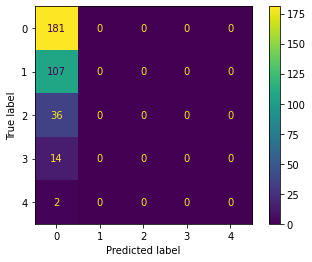

time: 215 ms (started: 2022-11-27 11:38:32 +00:00)


In [ ]:
#report completo sul modello migliore
y_pred = best_clf.best_estimator_.predict(x_test)
report = classification_report(y_test,y_pred)
confusion = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion)

print(report)
displ.plot()

#Logistic regression su dataset Bilanciato


In [ ]:
from imblearn.over_sampling import SMOTE 
import matplotlib.pyplot as plt
sm = SMOTE(random_state=42, k_neighbors=2)
X_res, y_res = sm.fit_resample(X_normalized, classification_y_all)

time: 371 ms (started: 2022-12-05 16:14:03 +00:00)


Text(0.5, 1.0, 'Dataset distibution over the number of collisions (resampled)')

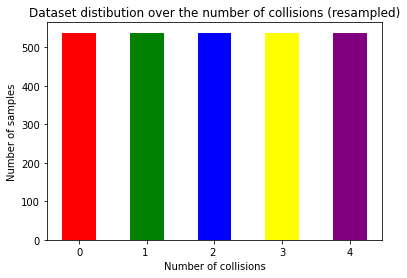

time: 150 ms (started: 2022-12-05 16:14:06 +00:00)


In [ ]:
occorrenze_collisioni = y_res.value_counts()
fig,ax = plt.subplots()

ax.bar(x=['0','1 ','2 ','3','4'],height=occorrenze_collisioni,width=0.5, color = ['red','green','blue','yellow','purple'])
ax.set_xlabel ("Number of collisions")
ax.set_ylabel ("Number of samples")
ax.set_title('Dataset distibution over the number of collisions (resampled)')

# for i in occorrenze_collisioni: 
#   print("Class ",i)


In [ ]:
from sklearn.utils import shuffle

indexes = np.arange(X_res.shape[0])
shuffled_indexes = shuffle(indexes)


X_balanced = X_res.to_numpy()[shuffled_indexes]
y_balanced = y_res.to_numpy()[shuffled_indexes]



time: 4.57 ms (started: 2022-12-05 16:14:55 +00:00)


In [ ]:
x_train_balanced, x_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced,y_balanced,train_size=0.66,random_state=200)

time: 10 ms (started: 2022-12-05 16:14:58 +00:00)


In [ ]:
best_clf = clf.fit(X_balanced, y_balanced)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
time: 1min 6s (started: 2022-11-27 11:41:13 +00:00)


In [ ]:
#Stampa migliori Parametri e performance
print(best_clf.best_params_)
print(best_clf.best_score_)
print("Best Estimator :",best_clf.best_estimator_)

{'classifier__C': 29.763514416313132, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'}
0.5631970260223049
Best Estimator : Pipeline(steps=[('classifier',
                 LogisticRegression(C=29.763514416313132, multi_class='ovr',
                                    solver='newton-cg'))])
time: 4.12 ms (started: 2022-11-27 11:45:12 +00:00)


              precision    recall  f1-score   support

           0       0.59      0.23      0.33       181
           1       0.38      0.22      0.28       107
           2       0.17      0.44      0.24        36
           3       0.09      0.64      0.16        14
           4       0.20      1.00      0.33         2

    accuracy                           0.27       340
   macro avg       0.28      0.51      0.27       340
weighted avg       0.46      0.27      0.30       340



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


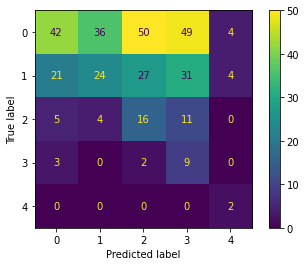

time: 194 ms (started: 2022-11-27 11:45:14 +00:00)


In [ ]:
#report completo sul modello migliore
y_pred = best_clf.best_estimator_.predict(x_test)
report = classification_report(y_test,y_pred)
confusion = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion)

print(report)
displ.plot()

#Linear Classification


In [ ]:
#transformo la y in one hot of k enconding
from sklearn.preprocessing import LabelBinarizer
y_one_hot = LabelBinarizer().fit_transform(classification_y_all)
id = random.randrange(0,len(y_one_hot))
print("Random sample: ",id," :",y_one_hot[id])


Random sample:  867  : [1 0 0 0 0]


In [ ]:
class LeastSquare:

    def __init__(self):
        self.w = [0, 0, 0]

    def fit(self,X,t):
        n = len(X) # nr. of examples
        t2 = np.c_[t, 1-t] # t2 is T: 1-of-K encoding
        phi = np.c_[np.ones(n), X] # design matrix
        self.w = np.matmul(np.linalg.pinv(phi),t2) # Least square solution
        print("Least square solution: %s" %(str(self.w.transpose())))

    def predict(self,x):
        xn = np.array((1, x[0][0], x[0][1]))
        yn = np.matmul(self.w.transpose(),xn)
        if yn[0]>yn[1]:
            return 1
        else:
            return -1

In [ ]:
class SimplePerceptron:

    def __init__(self, eta=0.01, niter=100):
        self.eta = eta
        self.niter = niter
        self.w = np.zeros(3)
    
    def fit(self,X,t):
        print('Perceptron model - eta: %f, niter: %d' %(self.eta, self.niter))
        n = len(X)
        # initial solution
        self.w = np.random.random()*np.ones(3)
        # niter iterations
        for i in range (0,self.niter):
            # select an instance
            k = int(np.random.random()*n)
            xk = np.array([1,X[k][0],X[k][1]])
            if (t[k]==1):
                tk = 1
            else:
                tk = -1
            # output
            o = np.sign(np.dot(self.w,xk))  # thresholded
            # update weigths
            self.w = self.w + self.eta * (tk-o) * xk
        print("Perceptron solution: %s" %str(self.w.transpose()))

    def predict(self,x):
        xn = np.array((1, x[0][0], x[0][1]))
        yn = np.matmul(self.w.transpose(),xn)        
        return np.sign(yn)

In [ ]:
class FisherDiscriminant:

    def __init__(self):
        self.w = [0, 0, 0]
        self.label = "Fisher Discriminant"

    def fit(self,X,t):
        n = len(X)  # num of examples
        # group the two subsets 
        # C1 = positive samples, C2 = negative samples
        C1 = np.ndarray((0,2))
        C2 = np.ndarray((0,2))
        for i in range(0,len(X)):
            if (t[i][0] == 1):
                C1 = np.vstack([C1, [X[i,0],X[i,1]]])
            else:
                C2 = np.vstack([C2, [X[i,0],X[i,1]]])			
        
        # compute means m1, m2
        m1 = np.mean(C1, axis=0)
        m2 = np.mean(C2, axis=0)
        
        # compute covariances S1, S2
        S1 = np.zeros((2,2))
        d = np.array(())
        for c in C1:
            d = np.subtract(c,m1).reshape(2,1)
            dt = d.transpose()
            S1 = S1 + np.matmul(d,dt)
        
        S1 = S1/len(C1);
        
        S2 = np.zeros((2,2))
        for c in C2:
            d = np.subtract(c,m2).reshape(2,1)
            dt = d.transpose()
            S2 = S2 + np.matmul(d,dt)
        S2 = S2/len(C2);
        
        # compute Sw matrix
        Sw = S1+S2
        
        # compute solution w 
        wt = np.matmul(np.linalg.inv(Sw),(m1-m2))
        
        # global mean
        mu = m1 * 0.5 + m2 * 0.5
        
        # compute constant term
        w0 = np.dot(wt,mu)
        
        # format the final solution
        self.w = np.array([-w0, wt[0], wt[1]])
        print("Fisher discriminant solution: %s" %str(self.w.transpose()))

    
    def predict(self,x):
        xn = np.array((1, x[0][0], x[0][1]))
        yn = np.matmul(self.w.transpose(),xn)
        if yn>0:
            return 1
        else:
            return -1

In [ ]:
# Plot Functions
def plotData(X,t,XNr=None,XNg=None,label='Data'):
    Xr = np.ndarray((0,2))
    Xg = np.ndarray((0,2))
    for i in range(0,len(X)):
        if (t[i][0]==1):
            Xr = np.vstack([Xr, [X[i,0],X[i,1]]])
        else:
            Xg = np.vstack([Xg, [X[i,0],X[i,1]]])
            
    if (not XNr is None):
        plt.plot(XNr[:,0],XNr[:,1],'.', color='#FFAAAA')
    if (not XNg is None):
        plt.plot(XNg[:,0],XNg[:,1],'.', color='#AAFFAA')

    plt.plot(Xr[:,0],Xr[:,1],'ro')
    plt.plot(Xg[:,0],Xg[:,1],'go')
    plt.axis([0,10,0,10])
    plt.title(label)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()
    
# Plot results of a solution
def plotResult(X, t, clf, label):
    XNr = np.ndarray((0,2))
    XNg = np.ndarray((0,2))

    for u in np.arange(0,10,0.1):
        for v in np.arange(0,10,0.1):
            xn = np.array([[u, v]])
            yn = clf.predict(xn)
            if (yn<0):
                XNg = np.vstack([XNg, [u,v]])
            else:
                XNr = np.vstack([XNr, [u,v]])
        
    plotData(X,t,XNr,XNg,label)

In [ ]:
classifier_name = 'S'

ClassifierMap = {
    'L': [LeastSquare, 'Least Square'], 
    'F': [FisherDiscriminant, 'Fisher Discriminant'], 
    'p': [SimplePerceptron, 'Simple Perceptron'], 
    'P': [Perceptron, 'Perceptron'], 
    'S': [svm.LinearSVC, 'SVM']
    }

classifier = ClassifierMap[classifier_name][0]()

# train the classifier
classifier.fit(X_normalized,classification_y_all)

LinearSVC()

In [ ]:
#Plot del dataset
#plotData(X_normalized,classification_y_all)
#X_normalized.plot()
print(X_normalized.shape)
# plotResult(X_normalized,classification_y_all,classifier,ClassifierMap[classifier_name][1])

(1000, 35)


In [ ]:
#Parametri per simple perceptron
eta = 0.001
niter = 1000

if (classifier_name == 'p'):  # SimplePerceptron
    classifier.eta = eta
    classifier.niter = niter

In [ ]:
#TRAINING & plot usando i diversi modelli di linear Classification
from sklearn.linear_model import Perceptron
from sklearn import svm


ClassifierMap = {
    'L': [LeastSquare, 'Least Square'], 
    'F': [FisherDiscriminant, 'Fisher Discriminant'], 
    'p': [SimplePerceptron, 'Simple Perceptron'], 
    'P': [Perceptron, 'Perceptron'], 
    'S': [svm.LinearSVC, 'SVM']
    }


classifier_name = 'L'
classifier = ClassifierMap[classifier_name][0]()
classifier.fit(X_normalized,y_one_hot)
#plotResult(X_normalized,y_one_hot,classifier,ClassifierMap[classifier_name][1])

Least square solution: [[ 6.44257437e-01 -1.46751334e-01  7.64962406e-02  1.23011764e-02
  -1.90490067e-01  7.14402583e-02 -4.85785202e-02 -7.47845874e-02
   1.60673529e-01  8.68107573e-02  1.39307109e-01  1.96201918e-01
   6.88114571e-03 -2.14514001e-01 -2.23887335e-02  1.31990621e-01
  -2.33624073e-01  7.61377618e-02 -1.13209446e-01 -3.93785177e-02
   2.04804606e-01  4.38836307e-02  4.23608791e-04  5.68152116e-02
   3.57624616e-02  8.59659212e-02 -3.38516919e-02 -1.38713158e-01
  -2.75019355e-02 -1.13398180e-01 -6.75854823e-02 -3.51532815e-02
  -1.27375126e-01 -4.69122103e-02  7.51176960e-02 -1.33445603e-03]
 [ 3.52630359e-01  1.47201519e-01  2.28690068e-02  1.73811691e-02
   2.76191530e-01 -1.06785100e-01 -9.41299199e-02  6.41767589e-02
  -5.03032859e-02 -8.67332054e-02 -1.68151251e-01 -1.00619130e-01
  -7.28485679e-02  1.17736950e-01  6.44029985e-02 -9.64881517e-02
  -5.93572688e-02  1.95256552e-02 -1.13828641e-02  9.15383676e-02
   9.18588570e-03 -1.25454984e-01  7.54432518e-03 -1

#Kernel Method for classification


In [ ]:
#GRID SEARCH SUL KERNEL
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
      'classifier__kernel' : ['rbf', 'poly', 'sigmoid','linear'],
      'classifier__gamma': [1,0.1,0.001],
      'classifier__C': np.logspace(-4, 4, 5)
     }
    ]

#Grid search Svm con kernel
pipe = Pipeline([('classifier' , svm.SVC())])
svm_clf = GridSearchCV(pipe, param_grid = param_grid, scoring="accuracy", cv = 10, verbose=10 , n_jobs=-1)

time: 3.4 ms (started: 2022-11-23 18:13:34 +00:00)


In [ ]:
#Addestramento
svm_clf.get_params()
svm_clf.fit(x_train, y_train) 

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=Pipeline(steps=[('classifier', SVC())]),
             n_jobs=-1,
             param_grid=[{'classifier__C': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04]),
                          'classifier__gamma': [1, 0.1, 0.001],
                          'classifier__kernel': ['rbf', 'poly', 'sigmoid',
                                                 'linear']}],
             scoring='accuracy', verbose=10)

time: 53min 9s (started: 2022-11-23 18:13:41 +00:00)


In [ ]:
print(svm_clf.best_params_)
print(svm_clf.best_score_)
print("Best Estimator :",svm_clf.best_estimator_)

{'classifier__C': 0.0001, 'classifier__gamma': 1, 'classifier__kernel': 'rbf'}
0.5409090909090908
Best Estimator : Pipeline(steps=[('classifier', SVC(C=0.0001, gamma=1))])
time: 1.41 ms (started: 2022-11-23 19:06:51 +00:00)


              precision    recall  f1-score   support

           0       0.53      1.00      0.69       181
           1       0.00      0.00      0.00       107
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00         2

    accuracy                           0.53       340
   macro avg       0.11      0.20      0.14       340
weighted avg       0.28      0.53      0.37       340



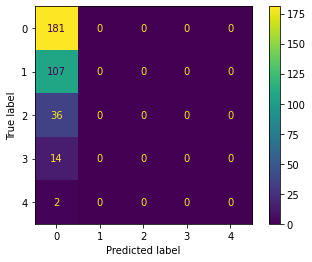

time: 221 ms (started: 2022-11-23 19:06:51 +00:00)


In [ ]:
#report completo sul modello migliore
y_pred = svm_clf.best_estimator_.predict(x_test)
report = classification_report(y_test,y_pred)
confusion = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion)

print(report)
displ.plot()

In [ ]:
#ADDESTRAMENTO SULLA migliore combinazione
kernel_name  = 'rbf' # 'linear', 'poly', 'rbf', 'sigmoid'

best = svm.SVC(C=0.0001, kernel=kernel_name, gamma=1)

#training
best.fit(x_train,y_train)

#predict
y_pred = best.predict(x_test)


#performance
report = classification_report(y_test,y_pred)
print(accuracy_score(y_test,y_pred))

0.5323529411764706


In [ ]:
#BAYESIAN OPTIMIZER PER KERNEL SVM
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization, UtilityFunction
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from scipy.special import expit
from sklearn.preprocessing import scale

def softmax(z):
    return np.exp(z) / np.sum(np.exp(z), axis = 1, keepdims = True)

def black_box_function(C, gamma):
    # C,gamma: SVC hyper parameter to optimize for.
    model = svm.SVC(C = C, kernel='rbf',gamma=gamma,probability=True)
    model.fit(x_train, y_train)    
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)

    #Un'altra misura
    #y_score = model.decision_function(x_test)
    #y_score = softmax(y_score)#restituisce la prob su 5 classi
    #f = roc_auc_score(y_test, y_score, multi_class="ovo")
    return accuracy 
  
# Set range of C to optimize for.
# bayes_opt requires this to be a dictionary.
pbounds = {"C": [1.e-04, 1.e+04],"gamma":[0.001,1]}

optimizer = BayesianOptimization(f = black_box_function,
                                 pbounds = pbounds, verbose = 2,
                                 random_state = 4)
bayesian_hpo_clf = optimizer.maximize(init_points = 8, n_iter = 100)
print("Best result: {}; f(x) = {}.".format(optimizer.max["params"], optimizer.max["target"]))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------
| 1         | 0.4706    | 9.67e+03  | 0.5477    |
| 2         | 0.5029    | 9.727e+03 | 0.7151    |
| 3         | 0.4735    | 6.977e+03 | 0.2169    |
| 4         | 0.4324    | 9.763e+03 | 0.007224  |
| 5         | 0.4559    | 2.53e+03  | 0.4354    |
| 6         | 0.4794    | 7.794e+03 | 0.1985    |
| 7         | 0.5147    | 8.63e+03  | 0.9834    |
| 8         | 0.4765    | 1.638e+03 | 0.5977    |
| 9         | 0.4765    | 8.629e+03 | 0.5969    |
| 10        | 0.5176    | 9.727e+03 | 0.991     |
| 11        | 0.4588    | 8.631e+03 | 0.3439    |
| 12        | 0.5       | 9.727e+03 | 0.7352    |
| 13        | 0.4618    | 2.61e+03  | 0.3807    |
| 14        | 0.5118    | 8.63e+03  | 0.9288    |
| 15        | 0.5147    | 9.728e+03 | 0.9859    |
| 16        | 0.4706    | 9.729e+03 | 0.3049    |
|

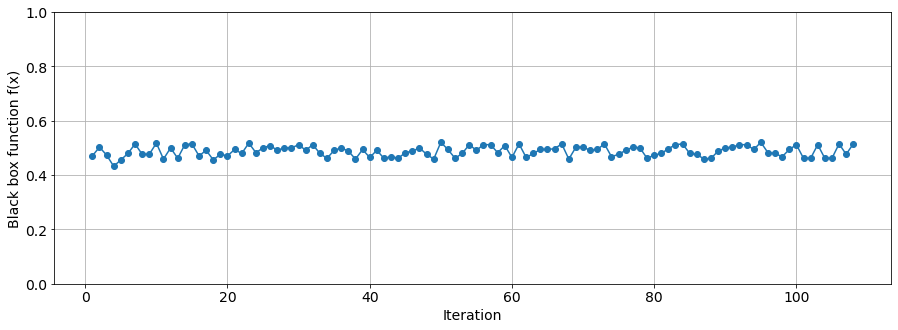

time: 325 ms (started: 2022-11-23 19:18:09 +00:00)


In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(range(1, 1 + len(optimizer.space.target)), optimizer.space.target, "-o")
plt.grid(True)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Black box function f(x)", fontsize = 14)
plt.ylim([0,1])
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

#ENSEMBLE

In [ ]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

np.set_printoptions(4)
random_state = 7
np.random.seed(random_state)

time: 1.46 ms (started: 2022-11-24 14:36:59 +00:00)


In [ ]:
classifier_name = 'S'

all_classifiers = {
    'G': [GaussianNB, 'Gaussian Naive Bayes'],
    'P': [Perceptron, 'Perceptron'],
    'S': [svm.LinearSVC, 'SVM']
    }

algorithm = 'SAMME' if classifier_name == 'S' or classifier_name == 'P' else 'SAMME.R'

model = all_classifiers[classifier_name][0]()
model.fit(x_train, y_train)

acc = model.score(x_test, y_test)    
print("Accuracy %.3f" %acc)

Accuracy 0.482
time: 148 ms (started: 2022-11-24 14:37:02 +00:00)


In [ ]:
print(f"Bagging parameters: {bagging_params}" )
print(f"Boosting parameters:  {boosting_params}")

Bagging parameters: {'max_samples': array([ 73,   5,  80, 316, 255]), 'n_estimators': [10, 20, 30]}
Boosting parameters:  {'learning_rate': array([0.6723, 0.694 , 0.346 , 0.9295, 0.2626]), 'n_estimators': [10, 20, 30]}


In [ ]:
bagging_classifier = BaggingClassifier(
    base_estimator=all_classifiers[classifier_name][0](), 
    max_samples=int(len(x_train)/2), 
    n_estimators=50,  
    random_state=random_state,
    ).fit(x_train, y_train)

bagging_acc = bagging_classifier.score(x_test, y_test)
print("Accuracy %.3f" %bagging_acc)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Accuracy 0.476
time: 4 s (started: 2022-11-24 14:37:15 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
adaboost_classifier = AdaBoostClassifier(
    base_estimator=all_classifiers[classifier_name][0](), 
    n_estimators=30, 
    learning_rate=0.001, 
    algorithm= algorithm,  # 'SAMME.R', 
    random_state=random_state
    ).fit(x_train, y_train)

ada_accuracy = adaboost_classifier.score(x_test, y_test)
print("Accuracy %.3f" %ada_accuracy)

Accuracy 0.532
time: 188 ms (started: 2022-11-24 14:37:19 +00:00)


#ENSEMBLE GRID SEARCH

In [ ]:
# Ensemble classifier parameters
n_estimators = [10, 20, 30]  # np.random.randint(5, 50, 5)

# Bagging parameters
bagging_params = {
  'max_samples': np.random.randint(5,int(len(x_train)/2), 5),
  'n_estimators': n_estimators,
}
# Boosting parameters
boosting_params = {
  'learning_rate': np.random.uniform(size=5),
  'n_estimators': n_estimators,
  }

time: 11.6 ms (started: 2022-11-23 19:27:25 +00:00)


In [ ]:
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

time: 1.07 ms (started: 2022-11-24 14:37:46 +00:00)


In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=random_state)
grid_search_boosting = GridSearchCV(
    adaboost_classifier,
    boosting_params, 
    scoring='accuracy', 
    cv=cv, 
    return_train_score=False,
    verbose=0
)
grid_search_bagging = GridSearchCV(
    bagging_classifier,
    bagging_params, 
    scoring='accuracy', 
    cv=cv, 
    return_train_score=False,
    # change max_features
    verbose=0
)

NameError: ignored

time: 15.6 ms (started: 2022-11-24 14:36:52 +00:00)


In [ ]:
grid_search_bagging.fit(x_train, y_train)
#Best parameters for the classifier
print("Best classification hyper-parameters for bagging classifier: %r" %grid_search_bagging.best_params_)
print("Best accuracy: %.4f" %grid_search_bagging.best_score_)



Best classification hyper-parameters for bagging classifier: {'max_samples': 73, 'n_estimators': 20}
Best accuracy: 0.5227
time: 42.3 s (started: 2022-11-23 19:31:38 +00:00)


In [ ]:
grid_search_boosting.fit(x_train, y_train)
#Best parameters for the classifier
print("Best classification hyper-parameters for boosting classifier: %r" %grid_search_boosting.best_params_)
print("Best accuracy: %.4f" %grid_search_boosting.best_score_)

Best classification hyper-parameters for boosting classifier: {'learning_rate': 0.28814559930799355, 'n_estimators': 10}
Best accuracy: 0.5379
time: 9.07 s (started: 2022-11-23 19:27:31 +00:00)


              precision    recall  f1-score   support

           0       0.54      0.82      0.65       181
           1       0.28      0.17      0.21       107
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00         2

    accuracy                           0.49       340
   macro avg       0.16      0.20      0.17       340
weighted avg       0.38      0.49      0.41       340



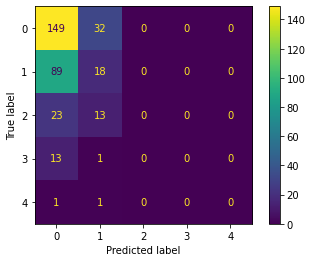

time: 245 ms (started: 2022-11-23 19:33:45 +00:00)


In [ ]:
y_pred = grid_search_bagging.best_estimator_.predict(x_test)
report = classification_report(y_test,y_pred)
confusion = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion)

print(report)
displ.plot()


              precision    recall  f1-score   support

           0       0.52      0.95      0.67       181
           1       0.09      0.01      0.02       107
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00         2

    accuracy                           0.51       340
   macro avg       0.12      0.19      0.14       340
weighted avg       0.31      0.51      0.36       340



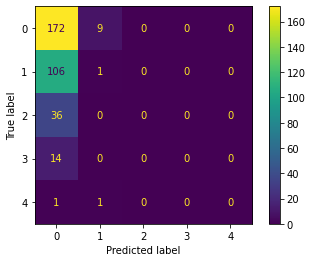

time: 442 ms (started: 2022-11-23 19:32:54 +00:00)


In [ ]:
y_pred = grid_search_boosting.best_estimator_.predict(x_test)
report = classification_report(y_test,y_pred)
confusion = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion)

print(report)
#displ.title("Confusion matrix for boosting Svm Grid Search")
displ.plot()

svm dataset bilanciato rbf kernel

In [ ]:
#ADDESTRAMENTO SULLA migliore combinazione
from sklearn.metrics import accuracy_score
kernel_name  = 'rbf' # 'linear', 'poly', 'rbf', 'sigmoid'

best = svm.SVC(C=0.0001, kernel="rbf", gamma=1)

#training
best.fit(X_balanced,y_balanced)

#predict
y_pred = best.predict(x_test)


#performance
report = classification_report(y_test,y_pred)
print(accuracy_score(y_test,y_pred))

0.6529411764705882
time: 1.62 s (started: 2022-11-24 14:36:03 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


              precision    recall  f1-score   support

           0       0.61      1.00      0.76       181
           1       0.96      0.25      0.40       107
           2       0.71      0.14      0.23        36
           3       1.00      0.50      0.67        14
           4       1.00      1.00      1.00         2

    accuracy                           0.65       340
   macro avg       0.86      0.58      0.61       340
weighted avg       0.75      0.65      0.59       340



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


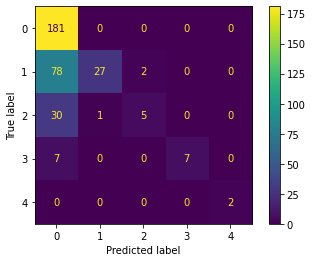

time: 392 ms (started: 2022-11-24 14:36:26 +00:00)


In [ ]:
#report completo sul modello migliore
y_pred = best.predict(x_test)
report = classification_report(y_test,y_pred)
confusion = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion)

print(report)
displ.plot()

In [ ]:
cv = KFold(n_splits=10, shuffle=True, random_state=random_state)
n_estimators = [10, 30, 50]  
boosting_params = {
  #'learning_rate': np.random.uniform(size=5),
  'learning_rate': [0.0001],
  'n_estimators': n_estimators,
  }

grid_search_boosting = GridSearchCV(
    adaboost_classifier,
    boosting_params, 
    scoring='accuracy', 
    cv=cv, 
    return_train_score=False,
    verbose=0
)

time: 12.4 ms (started: 2022-11-24 14:51:44 +00:00)


In [ ]:
grid_search_boosting.fit(X_balanced, y_balanced)
#Best parameters for the classifier
print("Best classification hyper-parameters for boosting classifier: %r" %grid_search_boosting.best_params_)
print("Best accuracy: %.4f" %grid_search_boosting.best_score_)

Best classification hyper-parameters for boosting classifier: {'learning_rate': 0.0001, 'n_estimators': 10}
Best accuracy: 0.4338
time: 23.7 s (started: 2022-11-24 14:51:50 +00:00)


              precision    recall  f1-score   support

           0       0.55      0.14      0.23       181
           1       0.34      0.12      0.18       107
           2       0.13      0.31      0.18        36
           3       0.04      0.21      0.06        14
           4       0.02      1.00      0.04         2

    accuracy                           0.16       340
   macro avg       0.22      0.36      0.14       340
weighted avg       0.42      0.16      0.20       340



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


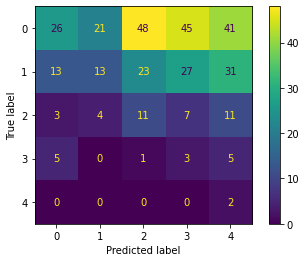

time: 297 ms (started: 2022-11-24 14:52:13 +00:00)


In [ ]:
y_pred = grid_search_boosting.best_estimator_.predict(x_test)
report = classification_report(y_test,y_pred)
confusion = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion)

print(report)
displ.plot()